#### Get the Data


In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import plotly.graph_objs as go



In [207]:
# Read the data
df = pd.read_csv("credit_risk_dataset.csv")
# Print the first 5 rows of the dataframe.
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [208]:
# Print categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"{column}: {len(df[column].unique())}")

person_home_ownership: 4
loan_intent: 6
loan_grade: 7
cb_person_default_on_file: 2


#### Data cleaning

In [209]:
# Print numerical columns
num = df.describe().T
# Print descriptive statistics of numerical columns
num.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
person_age,32581.000000,27.734600,6.348078,20.000000,23.000000,26.000000,30.000000,144.000000
person_income,32581.000000,66074.848470,61983.119168,4000.000000,38500.000000,55000.000000,79200.000000,6000000.000000
person_emp_length,31686.000000,4.789686,4.142630,0.000000,2.000000,4.000000,7.000000,123.000000
loan_amnt,32581.000000,9589.371106,6322.086646,500.000000,5000.000000,8000.000000,12200.000000,35000.000000
loan_int_rate,29465.000000,11.011695,3.240459,5.420000,7.900000,10.990000,13.470000,23.220000
loan_status,32581.000000,0.218164,0.413006,0.000000,0.000000,0.000000,0.000000,1.000000
loan_percent_income,32581.000000,0.170203,0.106782,0.000000,0.090000,0.150000,0.230000,0.830000
cb_person_cred_hist_length,32581.000000,5.804211,4.055001,2.000000,3.000000,4.000000,8.000000,30.000000


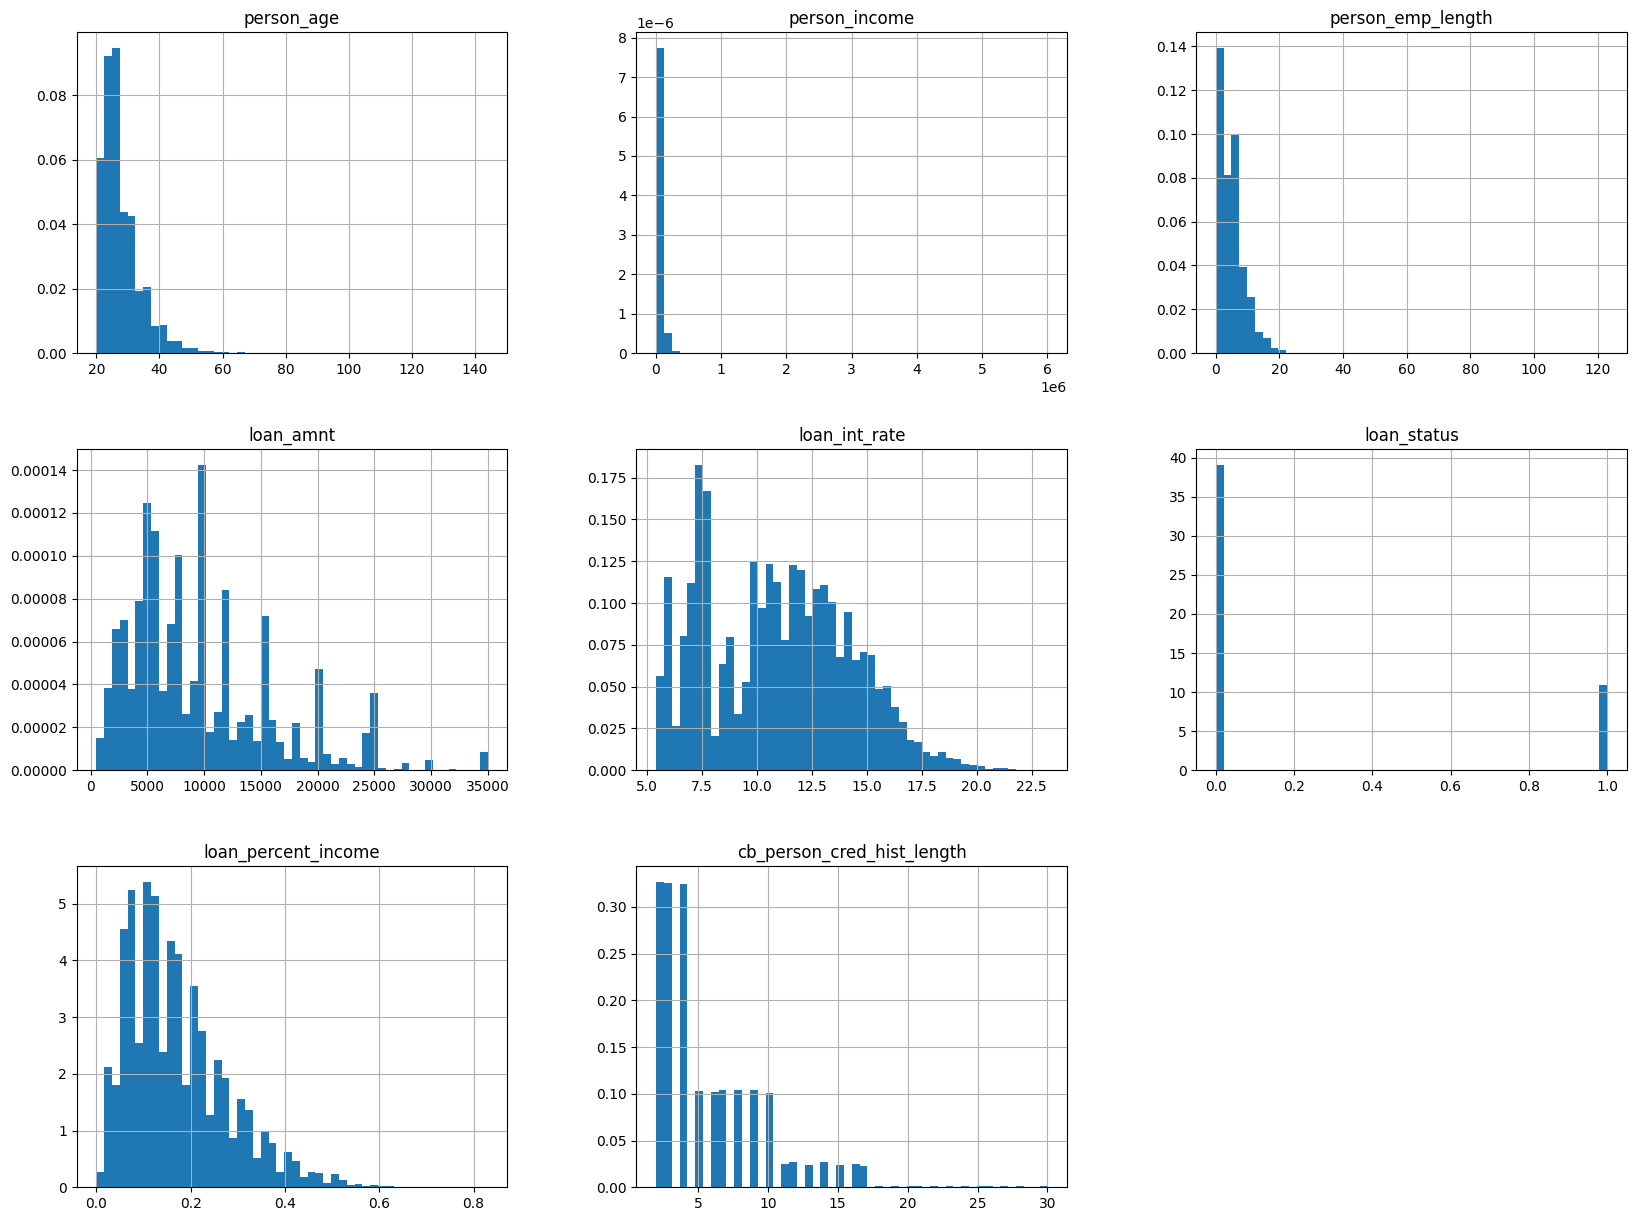

In [210]:
# Print the number of missing values in each column
df.hist(bins=50, figsize=(20,15), density = True)
plt.show()

In [211]:
# Print categorical variables
cat = df.describe(include="object").T
cat.style.background_gradient(cmap='Oranges')


,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


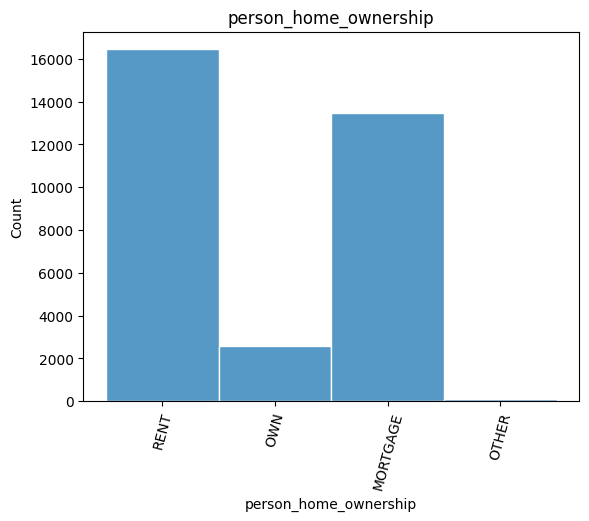

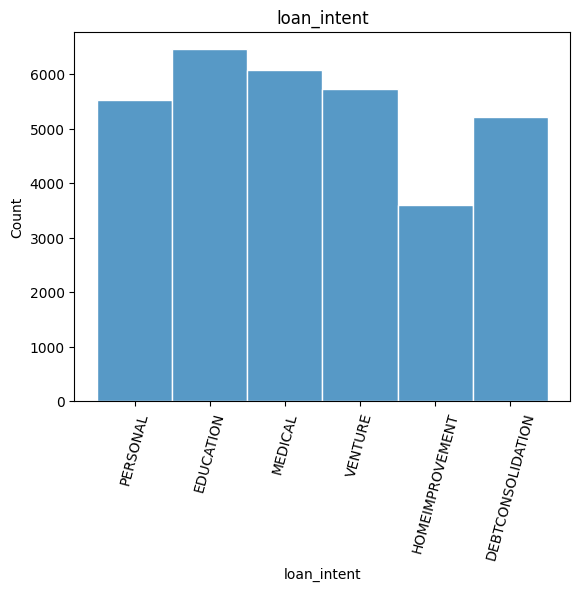

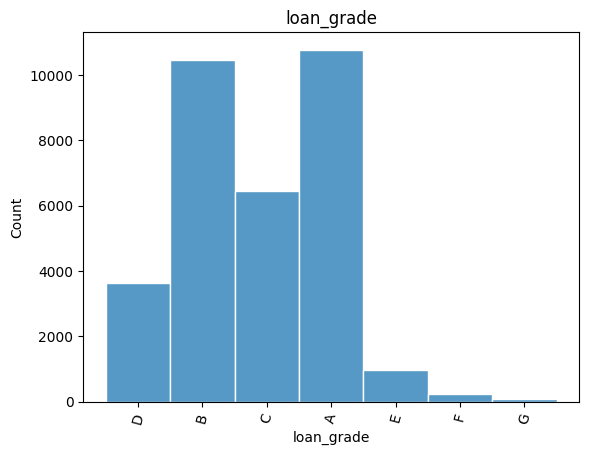

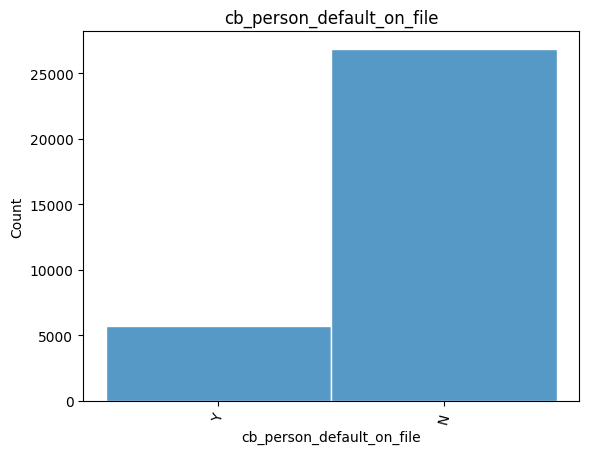

In [212]:
# Print histogram of categorical variables
for var in cat.index:
    sns.histplot(df[var], bins=50, edgecolor='white')
    plt.xticks(rotation=75)
    plt.title(var)
    plt.show()

#### Drop the missing values

In [213]:
# Print the number of missing values in each column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [214]:
# Drop missing values
df.dropna(axis=0, inplace=True)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


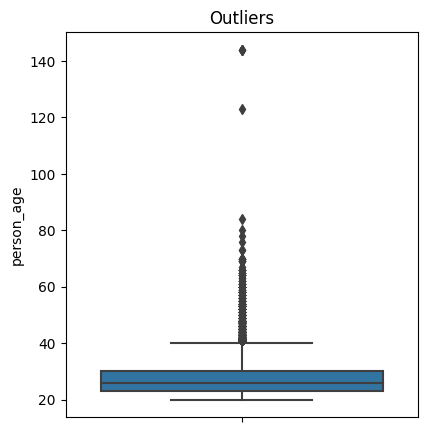

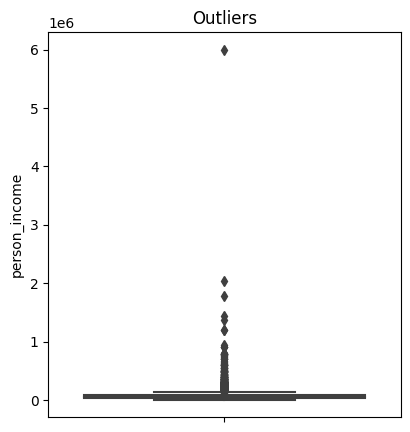

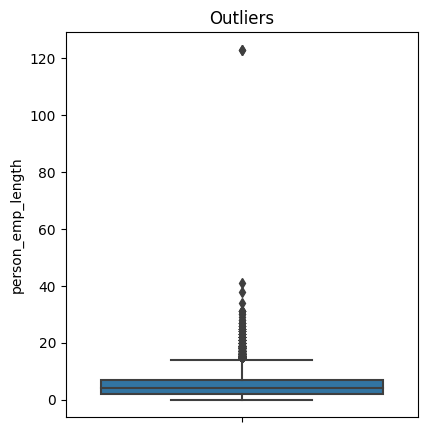

In [216]:
#  Finding the outliers
def plot_comparison(data):
    plt.figure(figsize=(10, 5)) # set the size of the figure
    plt.subplot(1, 2, 1) # 1st plot in the figure
    sns.boxplot(y=data[var],orient= 'y',  ) # boxplot of the variable in the 1st plot
    plt.title('Outliers') # title of the 1st plot
plt.show()

# Visualize outliers
for var in ['person_age', 'person_income', 'person_emp_length']:
    plot_comparison(df)


In [217]:
def remove_outliers(data, vars, multiplier= 1.5):
    """
    Remove outliers from the given DataFrame using the IQR method.

    Parameters
    ----------
    data : DataFrame
        The input dataset.
    vars : list
        A list of column names for which to remove outliers.
    multiplier : float, optional
        A factor to adjust the IQR range, by default 1.5.

    Returns
    -------
    DataFrame
        A new DataFrame with outliers removed.
    """
    data_clean = data.copy() # Create a copy of the input DataFrame to avoid modifying the original data
    for var in vars:  # Iterate through each variable/column name provided in the 'vars' list
        # Calculate the first quartile (Q1) and third quartile (Q3) for the current variable
        Q1 = data_clean[var].quantile(0.10)
        Q3 = data_clean[var].quantile(0.90)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outlier detection
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter out the rows containing outliers for the current variable
        data_clean = data_clean[(data_clean[var] >= lower_bound) & (data_clean[var] <= upper_bound)]

    return data_clean  # Return the cleaned DataFrame with outliers removed

# Remove outliers from continuous variables
df_data_clean = remove_outliers(df, ["person_age", "person_income", "person_emp_length"]) 
print(remove_outliers(df, ["person_age", "person_income", "person_emp_length"]))      

       person_age  person_income person_home_ownership  person_emp_length   
1              21           9600                   OWN                5.0  \
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32574          52          65004                  RENT                4.0   
32575          52          64500                  RENT                0.0   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32579          56         150000              MORTGAGE                5.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status   
1   

In [218]:
# Remove outliers from the given DataFrame using the z_score method.
def remove_outliers_z_score(data, vars, threshold = 3): # threshold = 3 means that we will remove the values that are more than 3 standard deviations away from the mean
    data_clean = data.copy() # Create a copy of the input DataFrame to avoid modifying the original data
    for var in vars: # Iterate through each variable/column name provided in the 'vars' list
        z_scores = np.abs(stats.zscore(data_clean[var])) # Calculate the z-scores for the current variable
        data_clean = data_clean[z_scores < threshold] # Filter out the rows containing outliers for the current variable
    return data_clean # Return the cleaned DataFrame with outliers removed
df_data_clean2 = remove_outliers_z_score(df, ["person_age", "person_income", "person_emp_length"]) # Remove outliers from continuous variables
   

In [219]:
# Remove outliers using median absolute deviation (MAD)
def remove_outliers_mad(data, vars, thereshold = 3.5):  # 3.5 is the default value
    data_clean = data.copy() # Create a copy of the input DataFrame to avoid modifying the original data
    for var in vars: # Iterate through each variable/column name provided in the 'vars' list
        median = np.median(data_clean[var]) # Calculate the median for the current variable
        mad = np.median(np.abs(data_clean[var]-median)) # Calculate the median absolute deviation (MAD) for the current variable
        if mad ==0: # If the MAD is 0, then the variable is constant and we can't remove any outliers
            continue # Skip to the next variable
        mad_z_scores = np.abs((data_clean[var]-median)/mad) # Calculate the z-scores for the current variable
        data_clean = data_clean[mad_z_scores < thereshold] # Filter out the rows containing outliers for the current variable
    return data_clean  # Return the cleaned DataFrame with outliers removed

df_data_clean3 = remove_outliers_mad(df, ["person_age", "person_income", "person_emp_length"]) # Remove outliers from continuous variables   


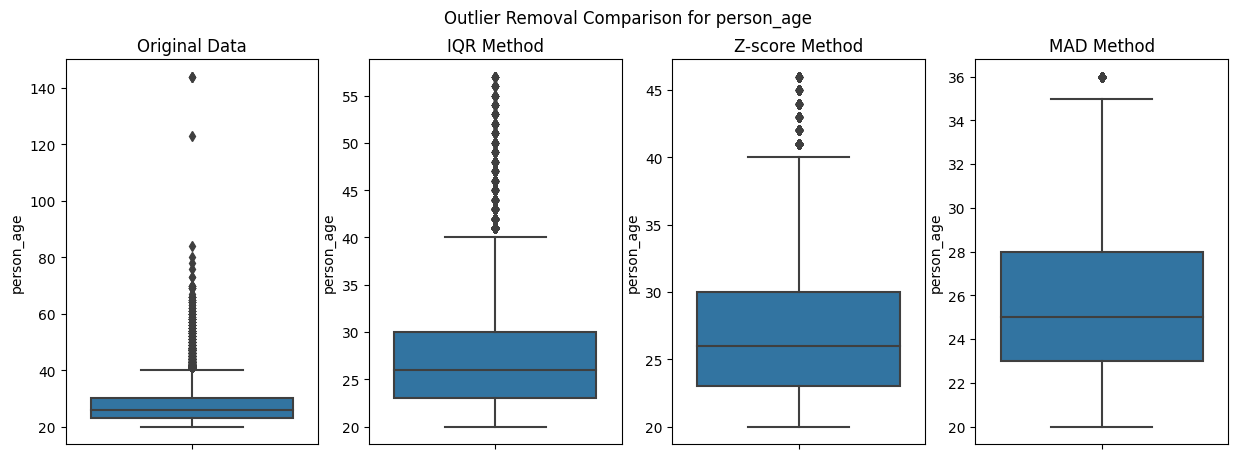

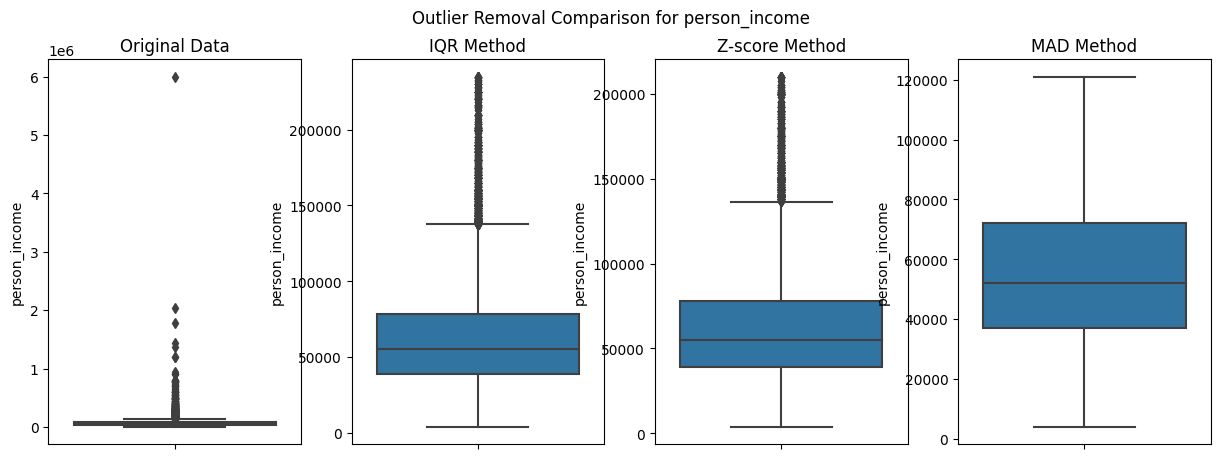

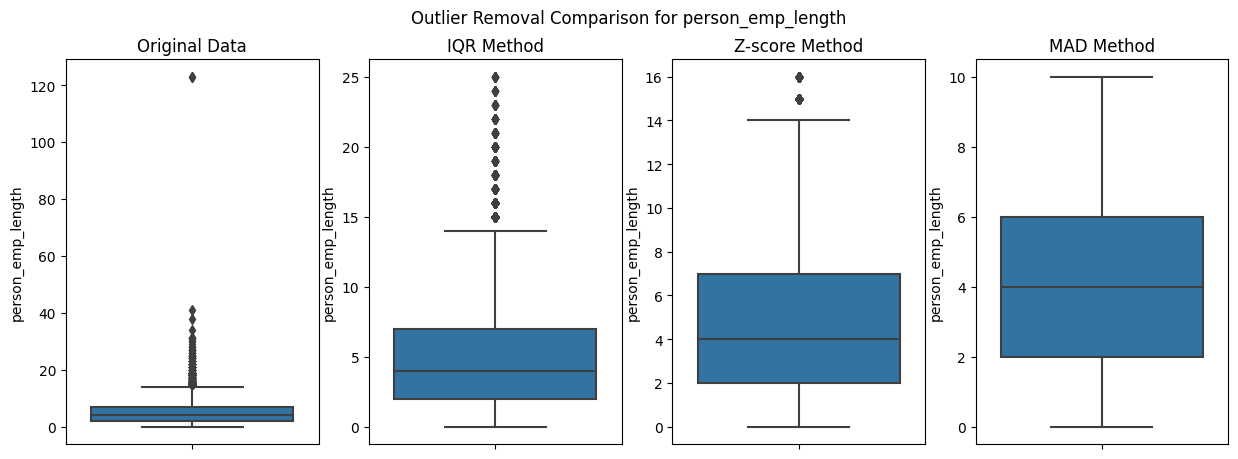

20


In [220]:

# Plot the comparison of the original data and the data with outliers removed
def plot_comparison(data, data_iqr, data_z, data_mad, var):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    sns.boxplot(y=data[var])
    plt.title('Original Data')

    plt.subplot(1, 4, 2)
    sns.boxplot(y=data_iqr[var])
    plt.title('IQR Method')

    plt.subplot(1, 4, 3)
    sns.boxplot(y=data_z[var])
    plt.title('Z-score Method')

    plt.subplot(1, 4, 4)
    sns.boxplot(y=data_mad[var])
    plt.title('MAD Method')

    plt.suptitle(f'Outlier Removal Comparison for {var}')
    plt.show()

# Remove outliers using IQR method
training_data_iqr = remove_outliers(df,['person_age', 'person_income', 'person_emp_length'], multiplier=1.5) 

# Remove outliers using Z-score method
training_data_z = remove_outliers_z_score(df, ['person_age', 'person_income', 'person_emp_length'], threshold=3)

# Remove outliers using MAD method
training_data_mad = remove_outliers_mad(df, ['person_age', 'person_income', 'person_emp_length'], thereshold=3.5)

# Plot comparison for each continuous variable
for var in ['person_age', 'person_income', 'person_emp_length']:
    plot_comparison(df, training_data_iqr, training_data_z, training_data_mad, var)

print(training_data_iqr['person_age'].min())


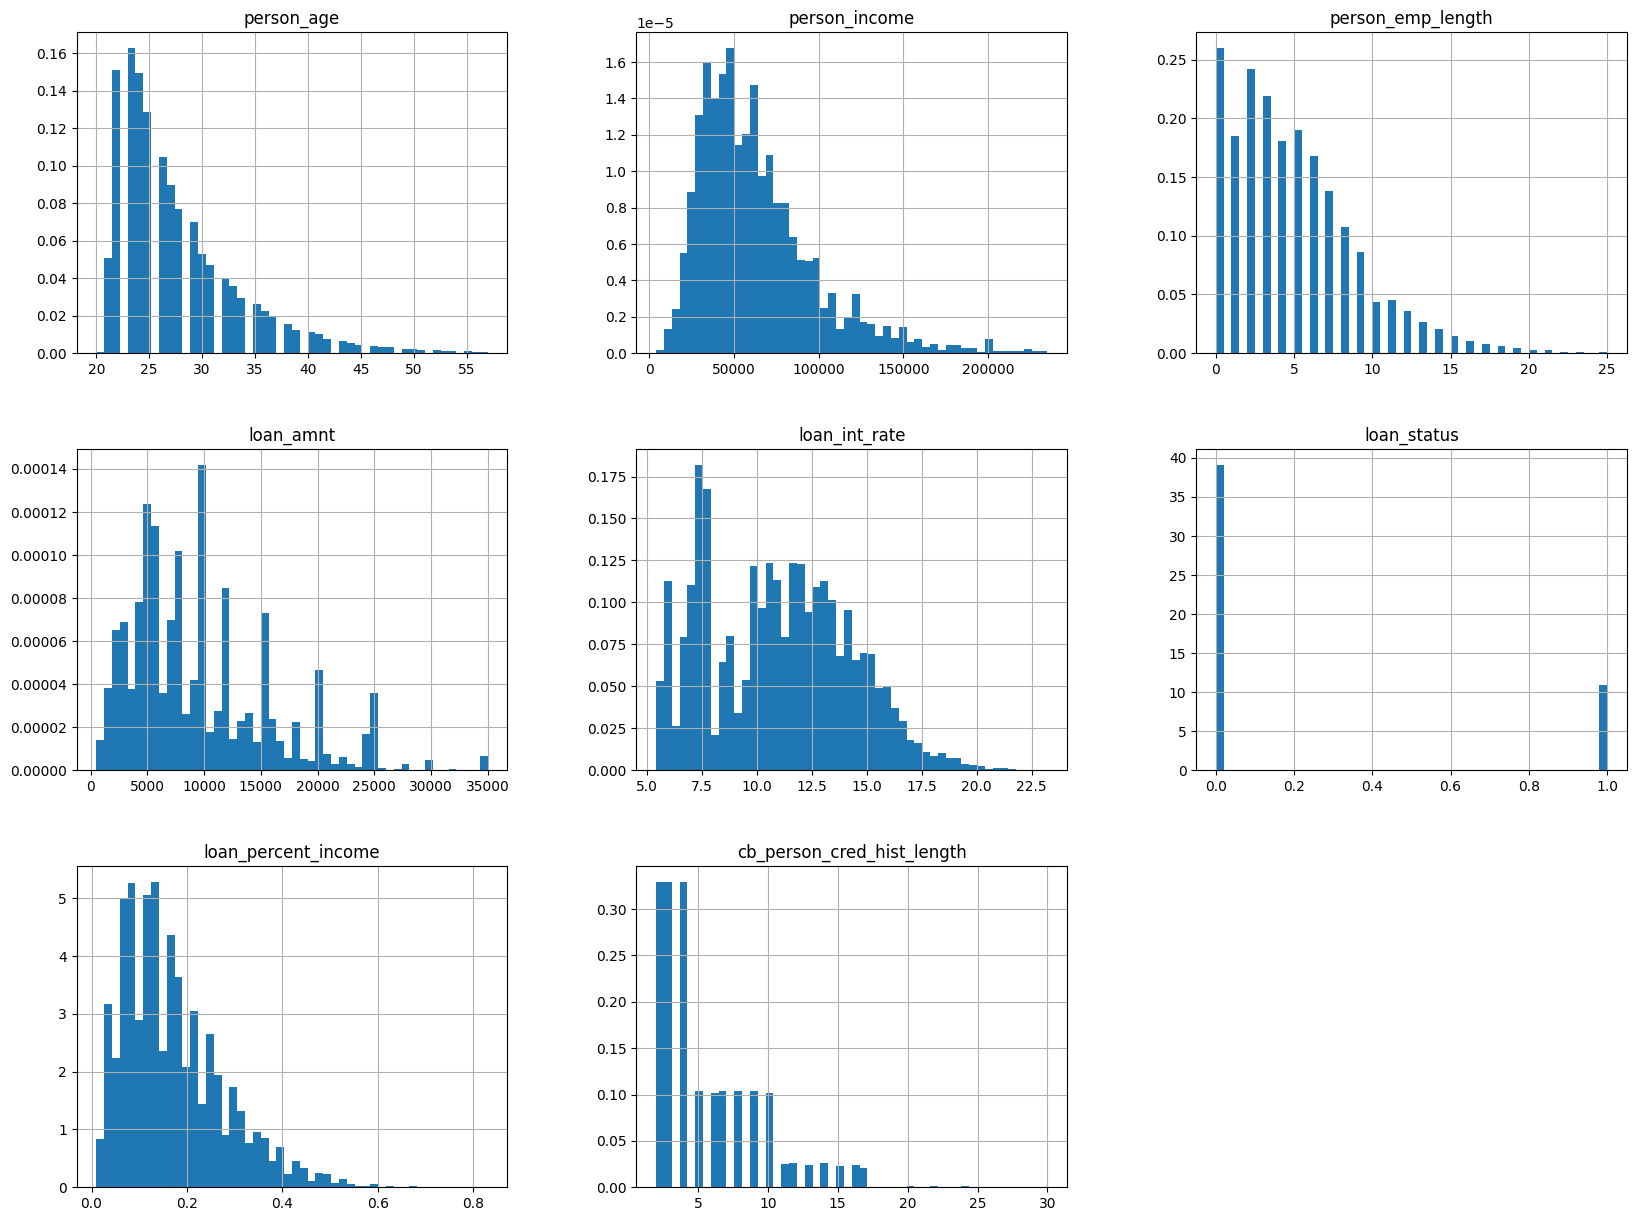

In [221]:
# Plot data when outliers are removed
df_data_clean.hist(bins=50, figsize=(20,15), density = True)
plt.show()

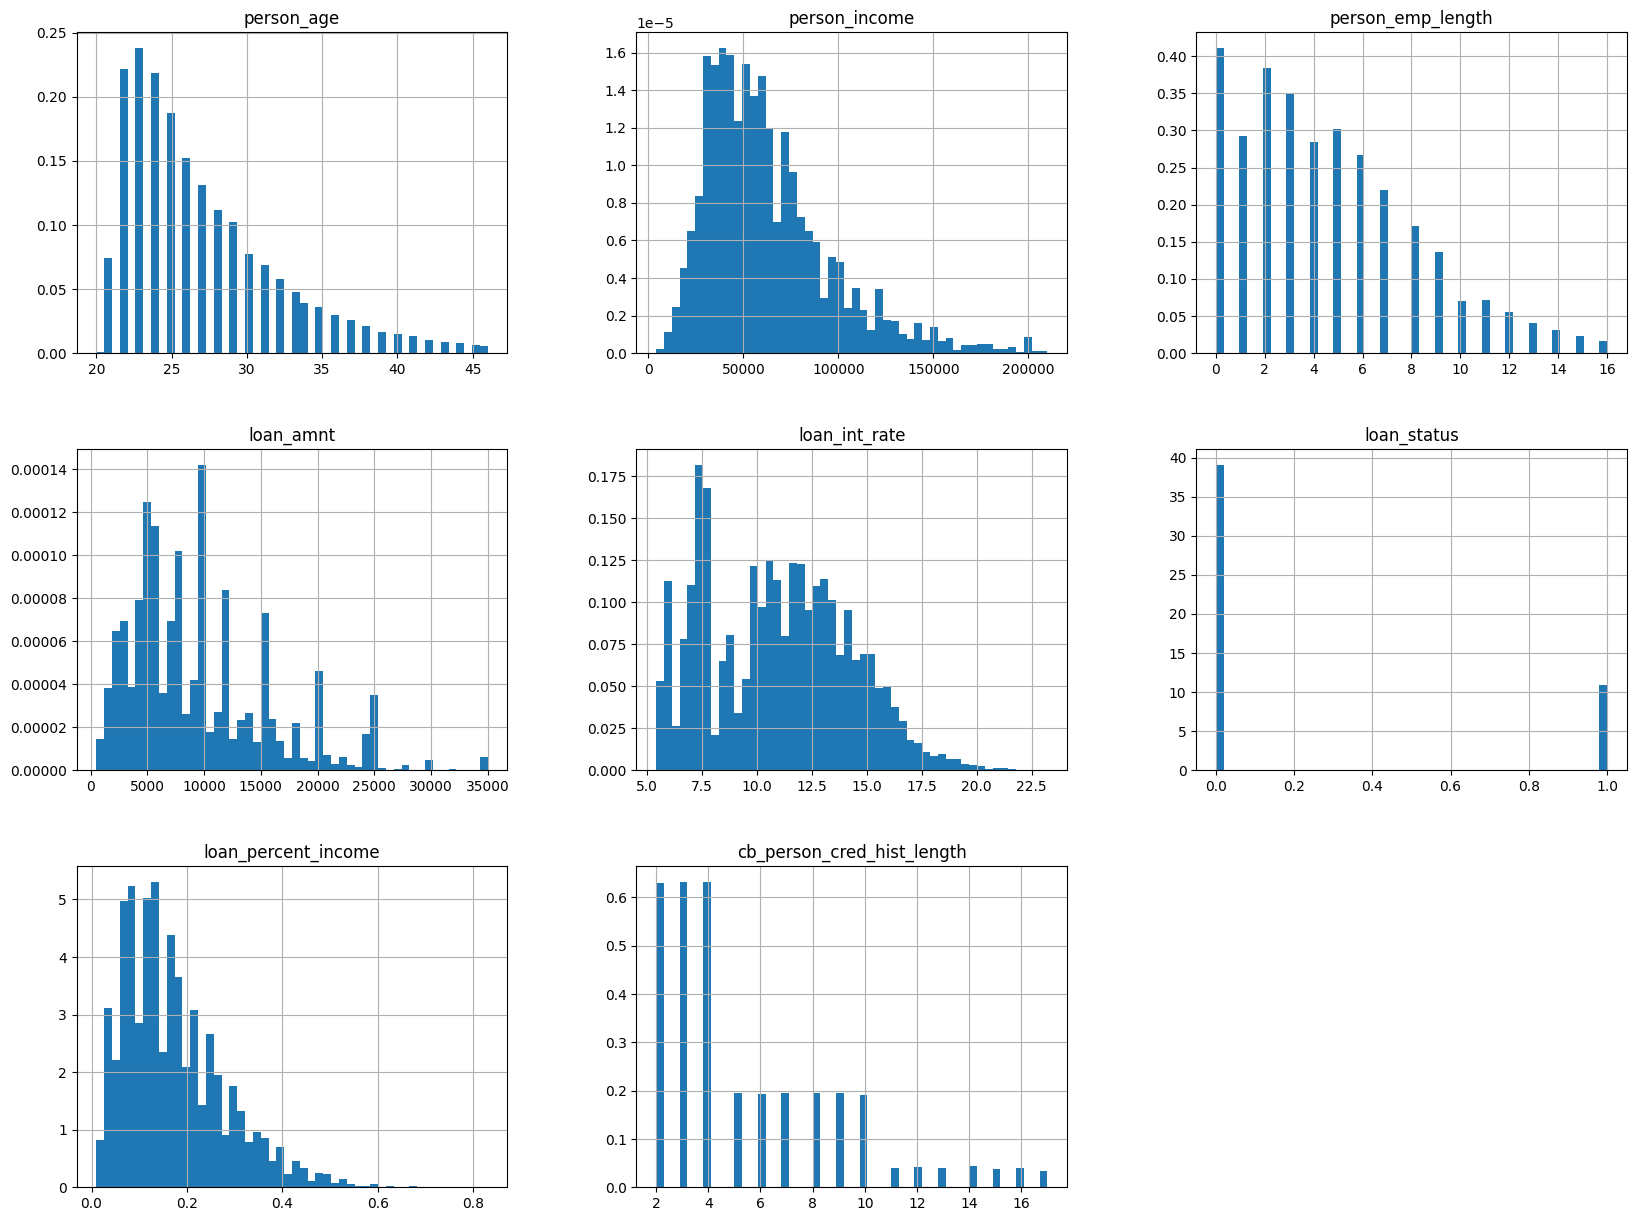

In [222]:
df_data_clean2.hist(bins=50, figsize=(20,15), density = True)
plt.show()

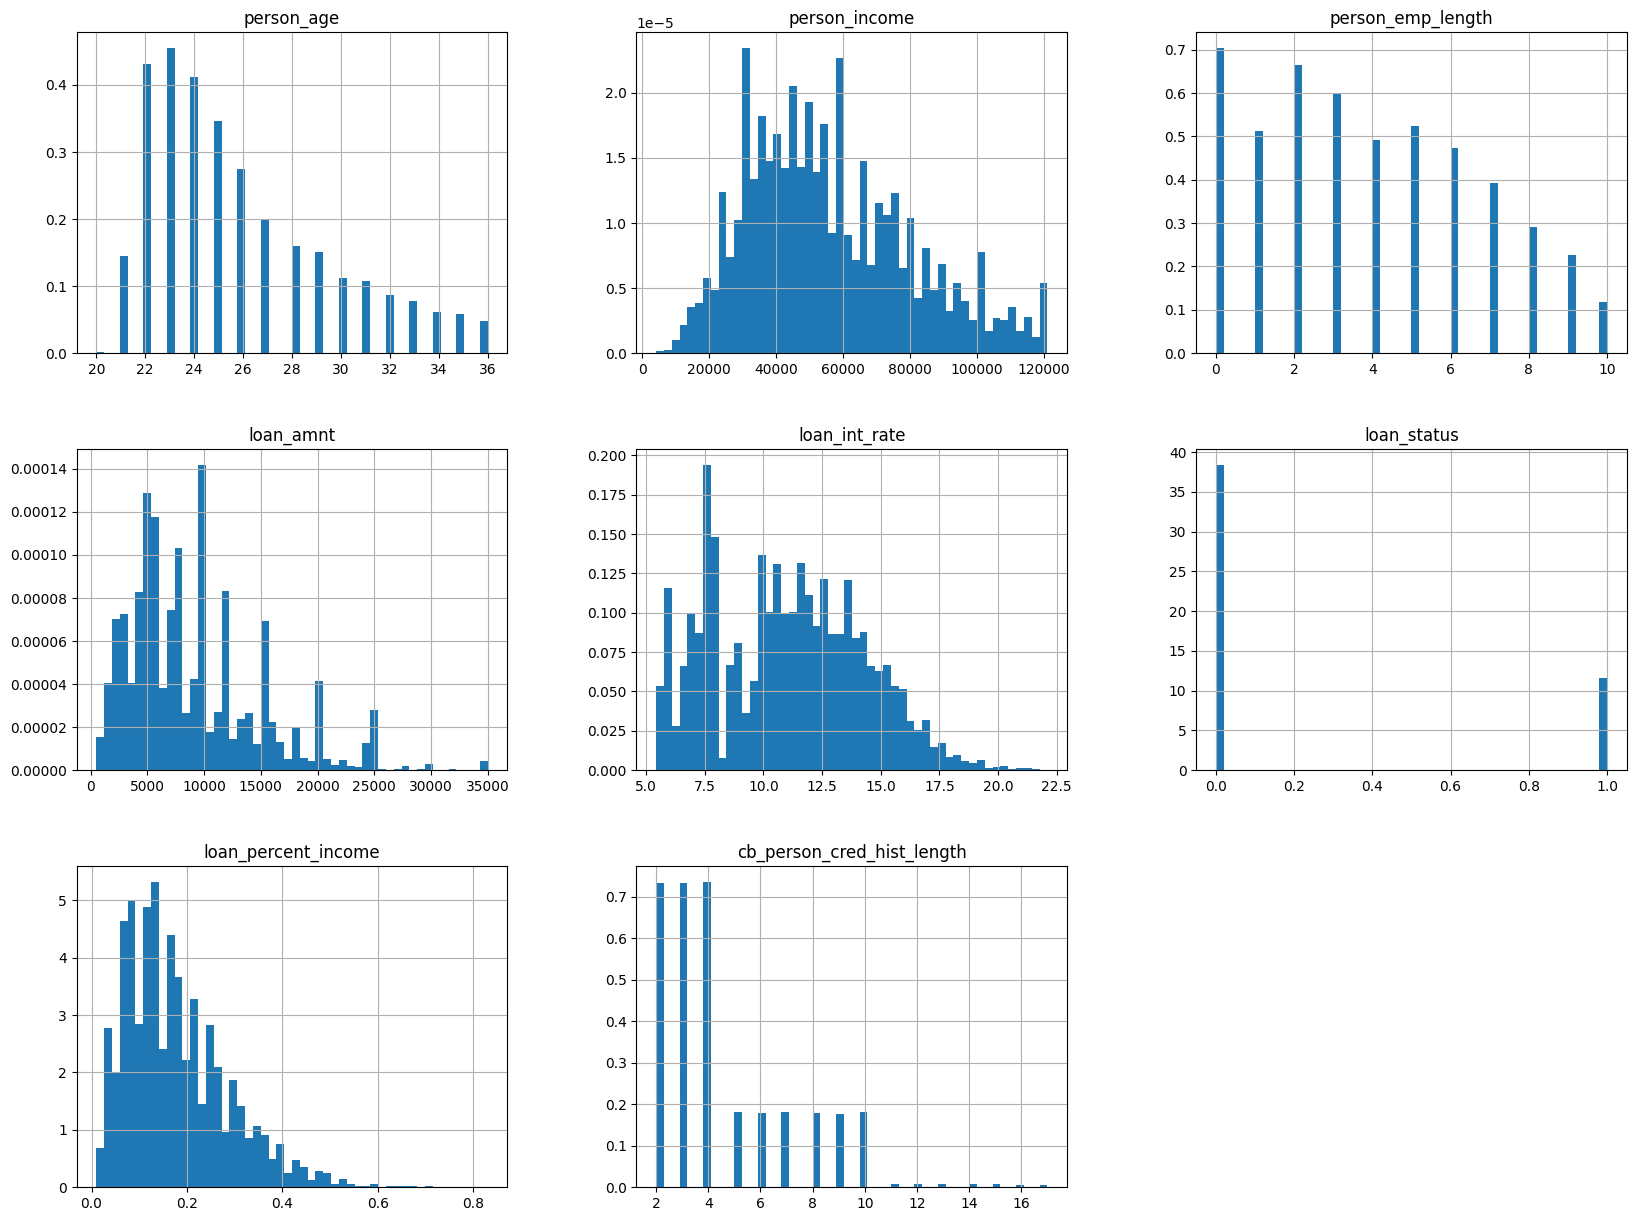

20

In [223]:
df_data_clean3.hist(bins=50, figsize=(20,15), density = True)
plt.show()
df_data_clean3['person_age'].min() 

#### 2. Predicted attribute (Prognozuojamas atributas) - loan_grade

In [224]:
# Chose the predictive attribute loan_grade
X = df_data_clean.drop("loan_grade", axis=1) # Drop the target variable loan_grade
y = df_data_clean["loan_grade"] # Target variable is loan_grade

In [225]:
# Encode the target variable loan_grade as an integer using LabelEncoder 
le = LabelEncoder() # Create a label encoder object
y = le.fit_transform(y) # Fit the label encoder and transform the target variable

#### 3-4 Split the data into train and test sets (Duomenų rinkinio padalijimas į mokymo ir testavimo)

In [226]:
# Split the data into training and test sets (80% training and 20% test) (Duomenų rinkinio padalijimas į mokymo ir testavimo rinkinius)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22611, 11) (5653, 11) (22611,) (5653,)


### 5. Creating a decision tree model (Sprendimų medžio sudarymas)

In [227]:

# Creating categorical columns (Kategorinių stulpelių sudarymas)
le = LabelEncoder() # Sukuriamas LabelEncoder objektas
X_train = X_train.apply(le.fit_transform) # Pritaikomas LabelEncoder objektas ir transformuojami duomenys
X_test = X_test.apply(le.fit_transform) # Pritaikomas LabelEncoder objektas ir transformuojami duomenys
# Sukuriamas Decision Tree modelis su Gini impurity
clf= DecisionTreeClassifier(criterion="gini", random_state=42) # Sukuriamas Decision Tree modelis su Gini impurity 
clf.fit(X_train, y_train) # Mokymosi algoritmas
print("Decision Tree Classifier using Gini Index\n", clf) # Spausdinamas Decision Tree modelis su Gini impurity

Decision Tree Classifier using Gini Index
 DecisionTreeClassifier(random_state=42)


#### 6. Decision tree visualization  (Sprendimų medžio vizualizacija) 

In [228]:
unique_classes = np.unique(y) # Get the unique classes in the target variable (Gauti unikalias reikšmes)
str_unique_classes = [str(x) for x in unique_classes] # Convert the unique classes to string (Konvertuoti unikalias klasifikatorių reikšmes į string tipo reikšmes)
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names = str_unique_classes , filled=True, rounded=True, special_characters=True) # Export the decision tree to a dot file
graph = graphviz.Source(dot_data) # Create a graph from dot file
graph.render("decision_tree1")  # Render the graph as a PDF file

'decision_tree1.pdf'

In [229]:
""" plt.figure(figsize =(20,10))
plot_tree(clf, filled= True, rounded= True, class_names= ['A', 'B', 'C', 'D', 'E', 'F', 'G'], feature_names= X.columns)
plt.show() """

" plt.figure(figsize =(20,10))\nplot_tree(clf, filled= True, rounded= True, class_names= ['A', 'B', 'C', 'D', 'E', 'F', 'G'], feature_names= X.columns)\nplt.show() "

### 7. Testing of decision tree model (Sprendimų medžio testavimas)

Accuracy: 77.2687 
Mean Absolute Error:  0.2485
Mean Squared Error:  0.2917
Root Squared Error:  0.7843
Confusion Matrix:
 [[1791   38    0    0    0    0    0]
 [   1 1267  506   68    0    0    0]
 [   0   58  894  178    4    0    0]
 [   0    3  181  354   88    0    0]
 [   0    0   20   85   59    6    0]
 [   0    0    0   13   24    3    0]
 [   0    0    0    2    8    2    0]]


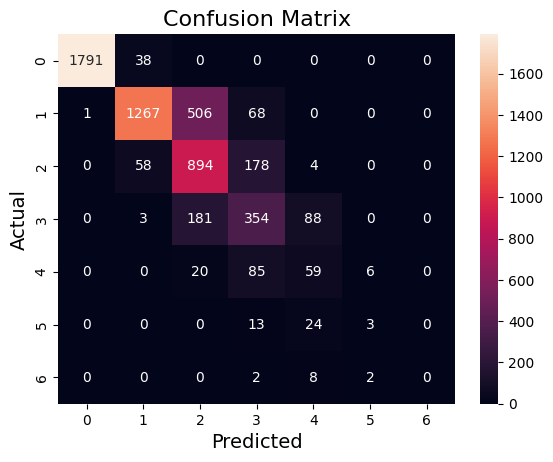

In [230]:
# Prognozuojame testavimo duomenis 
y_pred = clf.predict(X_test)

# Apskaiciuojmas  modelio tikslumas
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100 :.4f} ")

# Apskaiciuojamos paklaidos (mae, mse, rse)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rse = r2_score (y_test, y_pred)
print(f"Mean Absolute Error: {mae: .4f}")
print(f"Mean Squared Error: {mse: .4f}")
print(f"Root Squared Error: {rse: .4f}")

# Apskaiciuojama confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual", fontsize=14)
plt.xlabel("Predicted",fontsize=14)
plt.show()

#### 8. Keičiant maksimalų medžio gylį, eksperimentiniu būdu išmatuokite skirtingų gylių (3-4
#### variacijos) medžių formavimo trukmę bei gaunamą tikslumą, t.y. medžio auginimas stabdomas nuo tam tikro gylio

In [231]:
for max_depth in range(3, 7):
    clf_depth = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=max_depth) # Sukuriamas Decision Tree modelis su Gini impurity
    clf_depth.fit(X_train, y_train) # Mokymosi algoritmas
    y_pred = clf_depth.predict(X_test) # Prognozuojame testavimo duomenis
    accuracy = accuracy_score(y_test, y_pred) # Apskaiciuojmas  modelio tikslumas
    print(f"Accuracy for max_depth = {max_depth}: {accuracy * 100 :.4f} ") # Spausdinamas modelio tikslumas



Accuracy for max_depth = 3: 88.6609 
Accuracy for max_depth = 4: 89.3862 
Accuracy for max_depth = 5: 89.7930 
Accuracy for max_depth = 6: 89.4923 


#### 9. Creating Random Forest model (Suformuoti random forest modelį, su 5 medziais)

Accuracy (Random Forest): 86.6619 
Mean Absolute Error (Random Forest):  0.1626
Mean Squared Error (Random Forest):  0.2340
Root Mean Squared Error (Random Forest):  0.4838
Confusion Matrix (Random Forest):
[[1788   41    0    0    0    0    0]
 [  32 1810    0    0    0    0    0]
 [   0  180  922   32    0    0    0]
 [   0   47  200  379    0    0    0]
 [   0   10   24  136    0    0    0]
 [   0    5    0   35    0    0    0]
 [   0    0    0   12    0    0    0]]


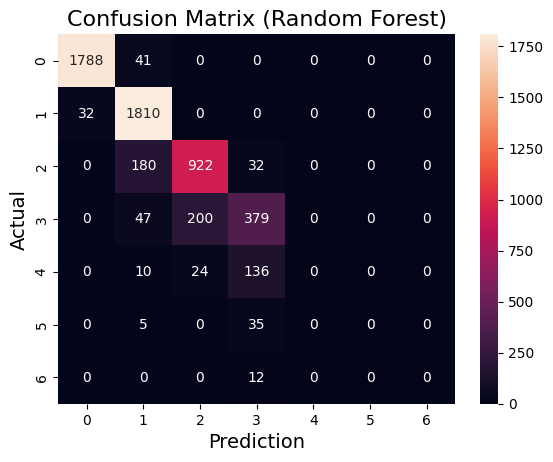

In [237]:
# Parenkamas maksimalus medžio gylis pagal geriausius rezultatus, pvz., 5
best_depth = 5

# Sukuriamas RandomForestClassifier su 5 medžiais 
rf_clf = RandomForestClassifier(n_estimators=5, max_depth=best_depth, random_state=42)

# Apmokomas atsitiktinis miškas su duomenimis
rf_clf.fit(X_train, y_train)

# Testavimo duomenys
y_pred_rf = rf_clf.predict(X_test)

# Apskaiciuotas atsitiktinio miško tikslumas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf * 100 :.4f} ")

# Apskaiciuotos paklaidos (mae, mse, rmse)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Mean Absolute Error (Random Forest): {mae_rf: .4f}")
print(f"Mean Squared Error (Random Forest): {mse_rf: .4f}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf: .4f}")

# Apskaiciuota susimaišymo matricą
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix (Random Forest):\n{confusion_matrix_rf}")

# Plot confusion matrix
sns.heatmap(confusion_matrix_rf, annot=True, fmt="g")
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.ylabel("Actual", fontsize=14)
plt.xlabel("Prediction",fontsize=14)
plt.show()


#### 10. Testavimas su random forest dydžiu [3-9]

In [238]:
for n_trees in range(1,5):
    rf_trees = RandomForestClassifier(n_estimators=n_trees, criterion="gini", max_depth = best_depth, random_state=42) # Sukuriamas Random Forest su n_trees medžiais
    rf_trees.fit(X_train, y_train)  # Apmokomi duomenys
    y_pred_trees = rf_trees.predict(X_test) # Testavimo duomenys
    accuracy_trees = accuracy_score(y_test, y_pred_trees) # Apskaiciuojamas tikslumas
    print(f"Number of decision trees : {n_trees}, Accuracy: {accuracy_trees * 100 :.4f} ")


Number of decision trees : 1, Accuracy: 71.3780 
Number of decision trees : 2, Accuracy: 85.0345 
Number of decision trees : 3, Accuracy: 84.6099 
Number of decision trees : 4, Accuracy: 87.2457 


#### 11. Comparison for Decision trees and Random forest models (Rezultatų palyginimas Decision trees ir Random forest modelių) 

In [234]:
print(f"Decission Tree Accuracy : {accuracy * 100 :.4f} ") # Spausdinamas Decision Tree tikslumas
print(f"Random Forest Accuracy : {accuracy_trees * 100 :.4f} ") # Spausdinamas Random Forest tikslumas

Decission Tree Accuracy : 89.4923 
Random Forest Accuracy : 87.2457 


In [235]:

# Tikslumo metrikos
dt_accuracy = accuracy
rf_accuracy = accuracy_trees

# Bar chart su modelių tikslumo metrikomis
trace1 = go.Bar(
    x=['Decision Tree', 'Random Forest'],
    y=[dt_accuracy, rf_accuracy],
    text=[f'{dt_accuracy:.2f}', f'{rf_accuracy:.2f}'],
    textposition='auto',
    marker=dict(color=['#1f77b4', '#ff7f0e'])
)

data = [trace1]
layout = go.Layout(
    title='Modelių tikslumo palyginimas',
    xaxis=dict(title='Modeliai'),
    yaxis=dict(title='Tikslumas')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
